In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt 


%matplotlib inline
from scipy import stats
from statsmodels.graphics.api import qqplot

# Introducción 

La mayoría de los métodos de series temporales solo son válidos si la serie temporal subyacente es estacionaria. Cuanto más estacionario es, más predecible es. 

¿Por qué nos importa si una serie es estacionaria?

1. Los procesos estacionarios se entienden mejor que los no estacionarios, y sabemos cómo estimarlos mejor. 

2. Las estadísticas  de ciertos procesos no estacionarios no siguen las distribuciones habituales. Saber cómo un proceso no es estacionario nos permitirá hacer las correcciones necesarias.

3. Si regresamos dos procesos integrados completamente no relacionados entre sí, entonces puede surgir un problema llamado "regresión espuria". En pocas palabras, si X e Y tiene una tendencia, entonces la regresión de Y en X probablemente indique una fuerte relación entre ellas, aunque no haya una conexión real. Ambos dependen del tiempo, por lo que parece que se están afectando entre sí. 

No todos los modelos AR(1) son estacionarios. Algunos crecen sin limites. Algunos tienen varianzas que cambian sobre el tiempo. ¿Qué restricciones sobre los parámetros debemos imponer en los modelos para generar procesos estacionarios?

# Restriciones sobre coeficientes AR(1)

Para el modelo 

$y_t = \beta_1 y_{t-1}+e_t$

puede ser escrito como 

$y_t - \beta_1 Ly_{t}=e_t$

donde la función $\Phi(L)=1 - \beta_1 L$ es llamada funcion lag-operator, cuya raíz característica es $\frac{1}{\beta_1}$

El modelo AR(1) es estacionario si la raíz es mayor a 1 lo cual significa que $|\beta_1|<1$.

In [34]:
arparams = np.array([1, -1.7])
maparams = np.array([1])

nobs = 240

y = arma_generate_sample(arparams, maparams, nobs)

In [35]:
y

array([ 1.05167420e+00,  8.35111444e-02, -6.82594791e-01, -1.35960061e+00,
       -1.98379117e+00, -3.03012856e+00, -4.81200452e+00, -6.37209505e+00,
       -1.03210776e+01, -1.84586582e+01, -3.00781216e+01, -5.28833720e+01,
       -9.00177811e+01, -1.54808129e+02, -2.63922847e+02, -4.47983275e+02,
       -7.62976691e+02, -1.29739435e+03, -2.20543670e+03, -3.74981315e+03,
       -6.37535054e+03, -1.08368689e+04, -1.84237327e+04, -3.13195829e+04,
       -5.32421698e+04, -9.05117631e+04, -1.53869050e+05, -2.61575968e+05,
       -4.44678142e+05, -7.55954311e+05, -1.28512160e+06, -2.18470599e+06,
       -3.71400161e+06, -6.31380141e+06, -1.07334617e+07, -1.82468840e+07,
       -3.10197035e+07, -5.27334953e+07, -8.96469424e+07, -1.52399801e+08,
       -2.59079663e+08, -4.40435428e+08, -7.48740227e+08, -1.27285839e+09,
       -2.16385925e+09, -3.67856073e+09, -6.25355324e+09, -1.06310405e+10,
       -1.80727689e+10, -3.07237071e+10, -5.22303020e+10, -8.87915135e+10,
       -1.50945573e+11, -

In [36]:
y=pd.DataFrame(y, columns=['y'])
y.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')

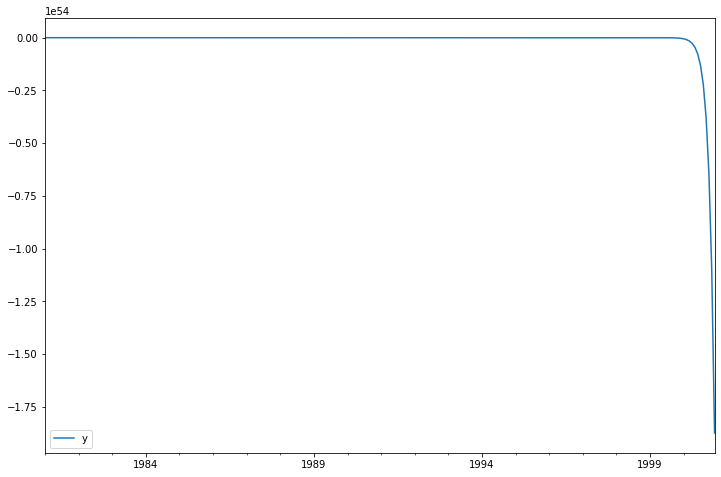

In [37]:
y.plot(figsize=(12,8))

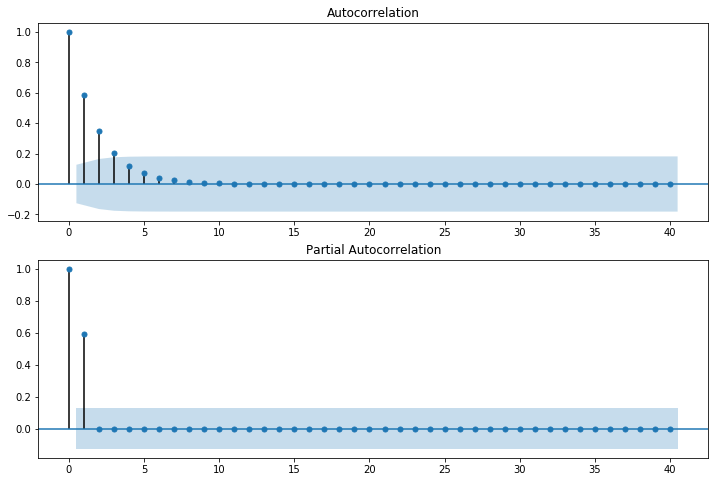

In [38]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

In [39]:
# Generar el modelo
model = sm.tsa.SARIMAX(y, order=(1,0,0), trend=None)

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

C:\Users\lfsanche\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                          SARIMAX Results                                          
Dep. Variable:                      y   No. Observations:                                       240
Model:               SARIMAX(1, 0, 0)   Log Likelihood      -2850723012410531042864950356738048.000
Date:                Thu, 25 Jun 2020   AIC                  5701446024821062085729900713476096.000
Time:                        11:04:34   BIC                  5701446024821062085729900713476096.000
Sample:                    01-31-1981   HQIC                 5701446024821062085729900713476096.000
                         - 12-31-2000                                                              
Covariance Type:                  opg                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   1.76e-34   5.68e+3

# Restriciones sobre coeficientes AR(2)

Considere el modelo AR(2)

$y_t = \beta_1 y_{t-1}+\beta_2 y_{t-2}+e_t$

puede ser escrito como 

$y_t - \beta_1 Ly_{t} - \beta_2 L^2y_{t}=e_t$

Donde la funcion lag-operator: $\Phi(L)=1 - \beta_1 L- \beta_2 L^2$, genera dos raices caracteristicas. El proceso AR(2) es estacionario si y solo si las raices caracteristicas estan fuera del circulo unitario (es decir son mayor a uno)

<!-- <img src="fig5.png"> -->


# Conexión entre procesos AR y MA

## Estacionariedad: AR(1) a MA($\infty$)

Si el proceso AR(1) es estacioanrio, se lo puede expresar como un proceso MA, y viceversa.

El modelo $y_t = \beta_1 y_{t-1}+e_t$, puede ser escrito como 

$y_t(1 - \beta_1 L)=e_t$

$y_t = \frac{e_t}{1 - \beta_1 L}= e_t + \beta_1e_{t-1}+ \beta_1^2e_{t-2}+ \beta_1^3e_{t-3}...$

Entonces AR(1) se puede expresar MA($\infty$) si $|\beta_1|<1$

## Invertibilidad: De MA(1) a AR($\infty$)

La estacionariedad nos permite expresar un AR(1) como MA($\infty$). Es posible expresar un MA(1) como un AR($\infty$). Esto es posible si el proceso MA es invertible.

El modelo $x_t = \alpha_1 u_{t-1}+u_t$, puede ser escrito como 

$x_t=(1 + \alpha_1 L)u_t$

$u_t = \frac{x_t}{1 - (-\alpha_1) L}= x_t - \alpha_1x_{t-1}+ \alpha_1^2x_{t-2}-\alpha_1^3x_{t-3}...$

$ x_t = u_t + \alpha_1x_{t-1} - \alpha_1^2x_{t-2}+\alpha_1^3x_{t-3}...$


El modelo MA(1) se puede convertir en un AR($\infty$) si la raiz caracteristica de la funcion lag-operator es mayor a 1. 

In [11]:
arparams = np.array([1])
maparams = np.array([1, 1.1])

nobs = 240

x = arma_generate_sample(arparams, maparams, nobs)

In [12]:
x=pd.DataFrame(x, columns=['x'])
x.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')

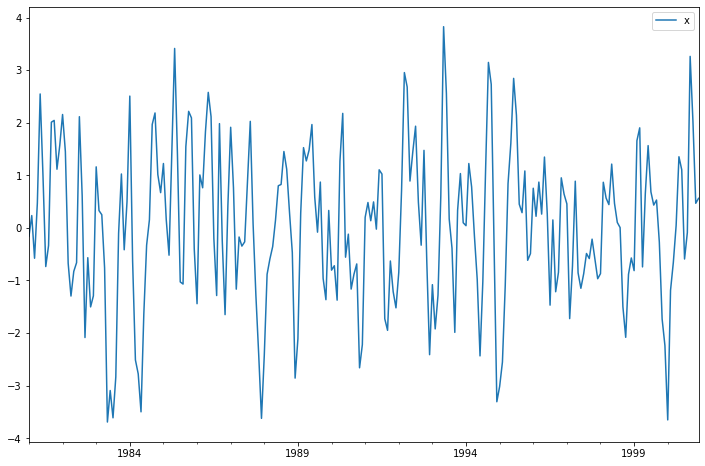

In [13]:
x.plot(figsize=(12,8))

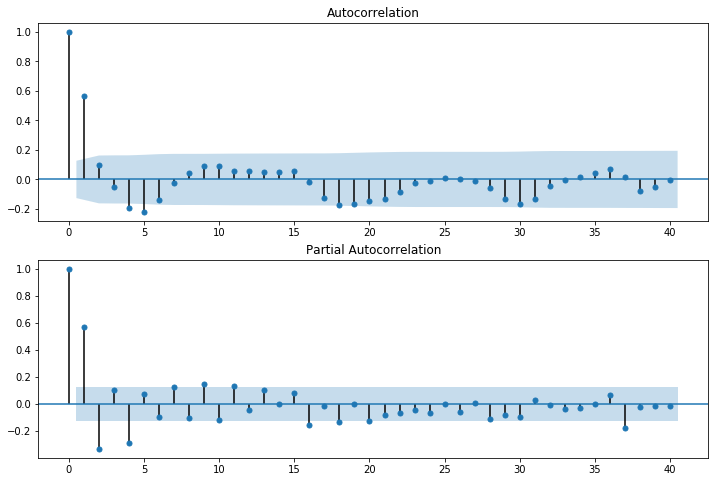

In [18]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x, lags=40, ax=ax2)

In [19]:
# Generar el modelo
model = sm.tsa.SARIMAX(x, order=(0,0,1), trend=None)

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  240
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -359.760
Date:                Thu, 25 Jun 2020   AIC                            723.520
Time:                        11:00:29   BIC                            730.482
Sample:                    01-31-1981   HQIC                           726.325
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9013      0.028     31.766      0.000       0.846       0.957
sigma2         1.1655      0.109     10.661      0.000       0.951       1.380
Ljung-Box (Q):                       42.53   Jarque-